In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

In [2]:
df=pd.read_csv('c:/Users/DELL/Downloads/archive (8).zip')
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
df.shape

(1994, 15)

In [4]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
df=df.drop('Index',axis=1)

In [6]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 4


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [9]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [10]:
x=df.corr()
print(x)

                           Title    Artist  Top Genre      Year  \
Title                   1.000000 -0.006027   0.001130 -0.008999   
Artist                 -0.006027  1.000000  -0.064602 -0.104310   
Top Genre               0.001130 -0.064602   1.000000  0.371344   
Year                   -0.008999 -0.104310   0.371344  1.000000   
Beats Per Minute (BPM)  0.007385 -0.027669   0.005064  0.012570   
Energy                 -0.031533  0.062556   0.046336  0.147235   
Danceability           -0.014618 -0.038820   0.129798  0.077493   
Loudness (dB)          -0.024744  0.011911   0.161204  0.343764   
Liveness                0.023673  0.021835   0.005615  0.019017   
Valence                -0.018882  0.040860  -0.066771 -0.166163   
Length (Duration)       0.044993  0.022350  -0.068536 -0.003813   
Acousticness            0.031175 -0.065888  -0.031232 -0.132946   
Speechiness             0.013086  0.015192   0.045097  0.054097   
Popularity             -0.025589  0.069574  -0.060706 -0.15896

In [9]:
data2 = df[["Beats Per Minute (BPM)", "Loudness (dB)", 
              ]]
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler(data2)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42)
clusters = kmeans.fit_predict(data2)

In [11]:
df["Music Segments"] = clusters
#MinMaxScaler(df["Music Segments"])
df["Music Segments"] = df["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4"})
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Music Segments
0,1530,443,2,2004,157,30,53,-14,11,68,80,94,3,71,Cluster 2
1,193,152,5,2000,135,79,50,-11,17,81,86,17,7,39,NaN
2,290,250,8,2001,168,69,66,-9,7,52,218,2,17,69,Cluster 2
3,1628,220,9,2007,173,96,43,-4,3,37,148,0,4,76,Cluster 2
4,1776,86,61,2002,106,82,58,-5,10,87,135,1,3,59,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,619,192,2,1958,94,21,70,-12,11,72,13,84,7,63,Cluster 1
1990,682,192,2,1958,175,76,36,-8,76,95,17,73,6,69,Cluster 2
1991,838,113,34,1959,168,80,53,-9,31,97,41,74,7,74,Cluster 2
1992,1554,627,28,1959,174,26,45,-13,7,60,202,54,4,65,Cluster 2


In [12]:
data2.head()

,Beats Per Minute (BPM),Loudness (dB)
0,157,-14
1,135,-11
2,168,-9
3,173,-4
4,106,-5


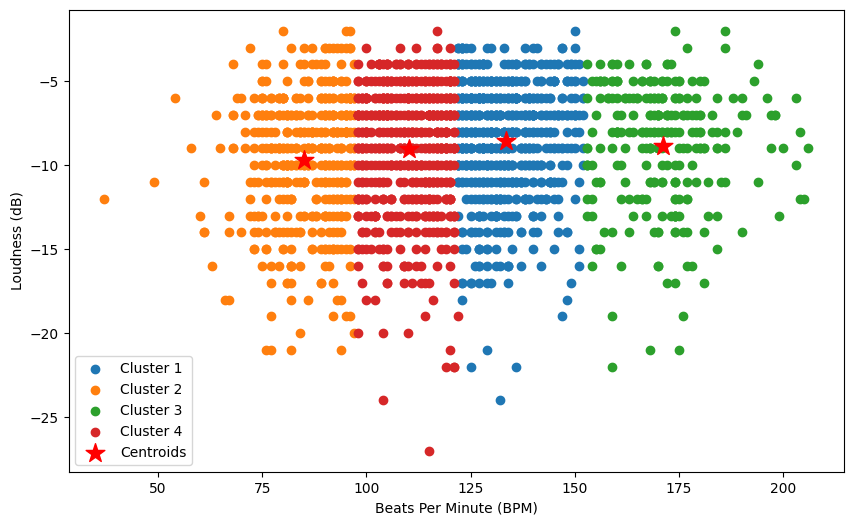

In [14]:
data2 = df[["Beats Per Minute (BPM)", "Loudness (dB)"]]
scaler = MinMaxScaler()
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data2)
df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
for i in range(4):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Beats Per Minute (BPM)'], 
                cluster_data['Loudness (dB)'], 
                label=f'Cluster {i+1}')

# Plotting cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='*', color='red', s=200, label='Centroids')

plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Loudness (dB)")
plt.legend()

plt.show()
